In [114]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav
import classify_2p as c2p
from scalebars import add_scalebar
from scipy.stats import chi2_contingency
import pandas as pd

#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30

from matplotlib.colors import LinearSegmentedColormap
colors = ['#020202', '#ffffff', "#316dc1" ]
custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)

In [140]:
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose'
all_avg_f, all_baseline_data_f, all_aligned_f, all_f = p2p.process_2p_folder(folder, align = 'lick', success = 'success')
all_baseline_tavg_f = []
for rec in all_baseline_data_f:
    avg_baseline_f = p2p.average_trials(rec)
    all_baseline_tavg_f.append(avg_baseline_f)
all_baseline_tavg_f = np.concatenate(all_baseline_tavg_f, axis=0)


(44, 26, 75)

(164, 75)

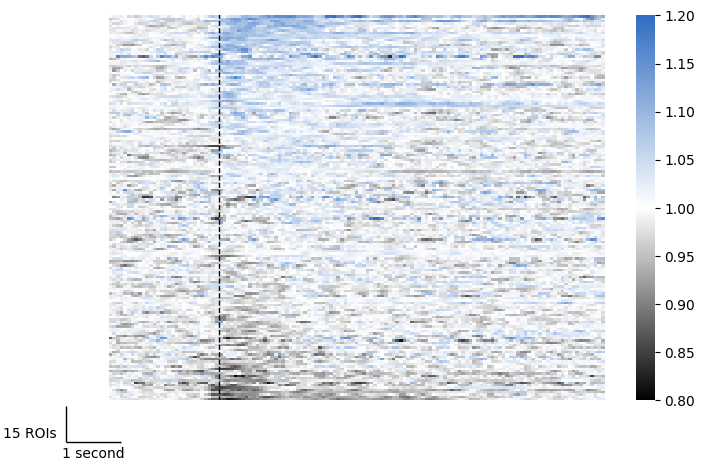

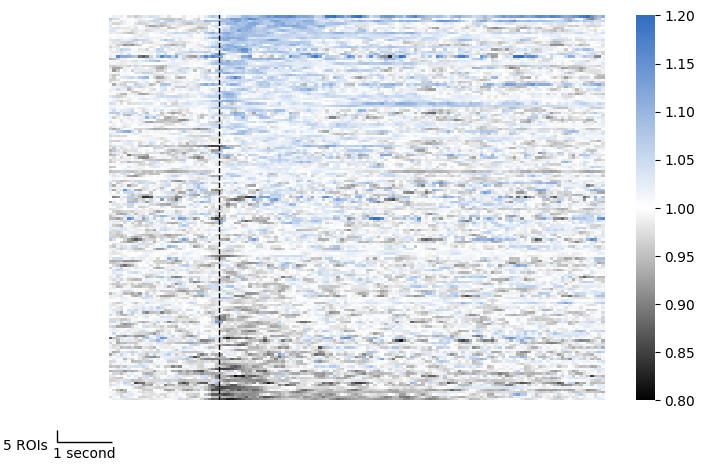

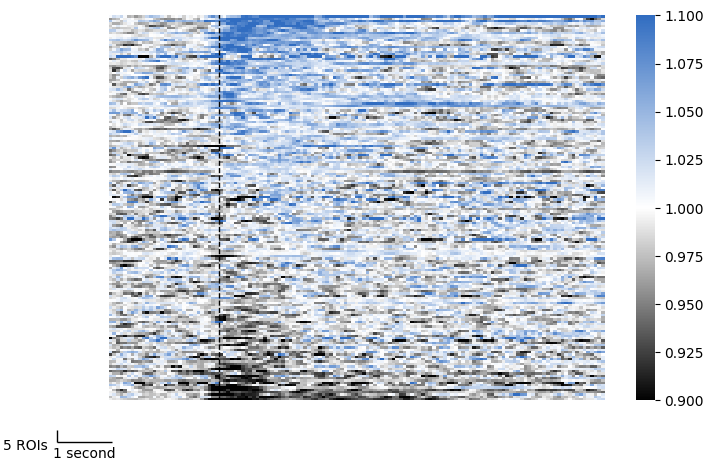

In [141]:
fig, ax = plt.subplots(1, figsize=(8, 5))
for cell in range(all_avg_f.shape[0]):
    all_avg_f[cell, :] = p2p.moving_average(all_avg_f[cell, :], 3)

ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fasted_heatmap_20.pdf')

fig, ax = plt.subplots(1, figsize=(8, 5))


sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fed_heatmap.pdf')


fig, ax = plt.subplots(1, figsize=(8, 5))


sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.9, vmax=1.1, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fed_heatmap.pdf')


In [138]:
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose'
all_avg_fed, all_baseline_data_fed, all_aligned_fed, all_fed = p2p.process_2p_folder(folder, align = 'lick', success = 'success')
all_baseline_tavg_fed = []
for rec in all_baseline_data_fed:
    avg_baseline_fed = p2p.average_trials(rec)
    all_baseline_tavg_fed.append(avg_baseline_fed)
all_baseline_tavg_fed = np.concatenate(all_baseline_tavg_fed, axis=0)

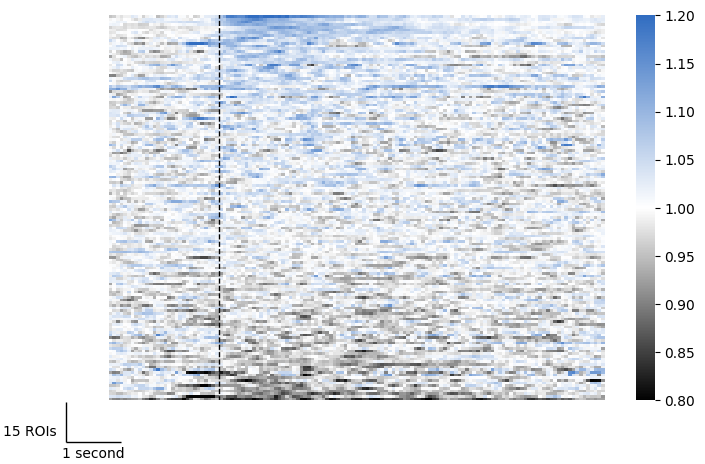

In [139]:
fig, ax = plt.subplots(1, figsize=(8, 5))
for cell in range(all_avg_fed.shape[0]):
    all_avg_fed[cell, :] = p2p.moving_average(all_avg_fed[cell, :], 3)

ascending_order = np.argsort(np.nanmean(all_avg_fed[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.20, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fed_heatmap_20.pdf')


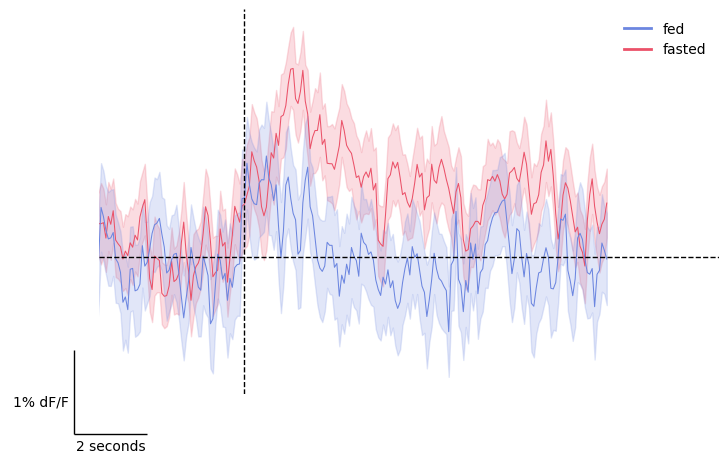

In [92]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_fasted = np.nanmean(all_avg_f, axis=0)
avg_fed = np.nanmean(all_avg_fed, axis=0)
avg_fasted = p2p.moving_average(avg_fasted, window_size = 3) - np.nanmean(avg_fasted[30:45]) + 1
avg_fed = p2p.moving_average(avg_fed, window_size = 3) - np.nanmean(avg_fed[30:50]) + 1
ax.plot(np.arange(0, 225), avg_fasted, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_fed, color = '#6c86e0', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_fasted - stats.sem(all_avg_f, axis=0), avg_fasted + stats.sem(all_avg_f, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_fed - stats.sem(all_avg_fed, axis=0), avg_fed + stats.sem(all_avg_fed, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
# ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 15, right = 270)
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.01, labely='1% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)
# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_state_avgtrace.pdf')

In [74]:
all_baseline_tavg_fed.shape, all_avg_fed.shape


((144, 75), (144, 225))

In [79]:
all_baseline_tavg_fed[:, 45:75].shape

(144, 30)

In [ ]:
fasted_baseline = p2p.get_auc(all_baseline_tavg_f, start_frame = 45, end_frame= 75, normalize = 2000)
fasted_postlick = p2p.get_auc(all_avg_f, start_frame = 75, end_frame= 105, normalize = 2000)

fed_baseline = p2p.get_auc(all_baseline_tavg_fed, start_frame = 45, end_frame= 75, normalize = 2000)
fed_postlick = p2p.get_auc(all_avg_fed, start_frame = 75, end_frame= 105, normalize = 2000)


In [85]:

auc_df = pd.concat([
    pd.Series(fasted_baseline, name='fasted_baseline'),
    pd.Series(fasted_postlick, name='fasted_postlick'),
    pd.Series(fed_baseline, name='fed_baseline'),
    pd.Series(fed_postlick, name='fed_postlick')
], axis=1)

# Save to CSV
auc_df.to_csv('untracked_state_auc_baselinevspost.csv', index=False)

(41, 19, 225)

In [124]:
sucrose_activated_pvals, sucrose_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f, all_aligned_f, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))



Responsive: 45
Unresponsive: 119
Total: 164
Inhibited: 13
Activated: 32


In [125]:
sucrose_activated_pvals_fed, sucrose_inhibited_pvals_fed, pvals, null_stats_fed, Wobs_fed = c2p.circ_shift(all_fed, all_aligned_fed, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))


Responsive: 37
Unresponsive: 107
Total: 144
Inhibited: 13
Activated: 24


In [126]:
suc_active = all_avg_f[sucrose_activated_pvals <= 0.05, :]
suc_inactive = all_avg_f[sucrose_inhibited_pvals <= 0.05, :]
suc_active_fed = all_avg_fed[sucrose_activated_pvals_fed <= 0.05, :]
suc_inactive_fed = all_avg_fed[sucrose_inhibited_pvals_fed <= 0.05, :]

Text(0.5, 25.722222222222214, 'Time from First Lick')

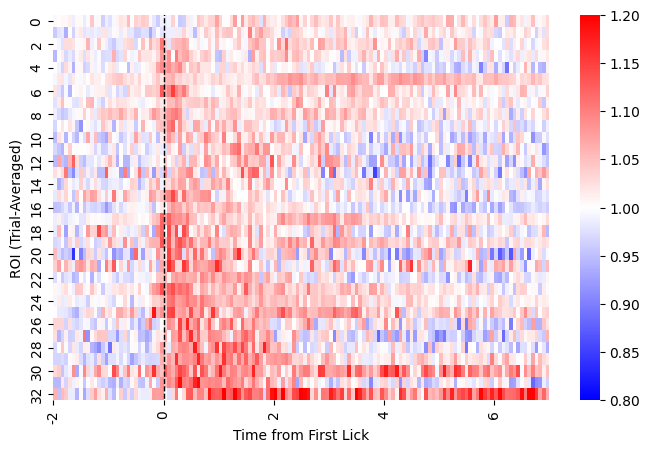

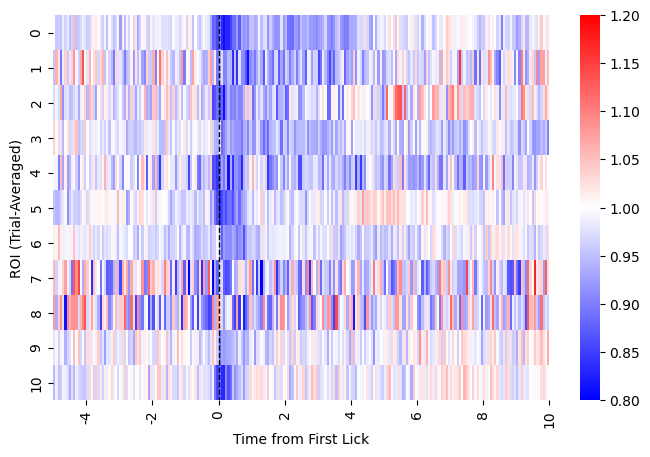

In [39]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active[:, 75:105], axis=1))
sorted_avg_mean = suc_active[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


Text(0.5, 25.722222222222214, 'Time from First Lick')

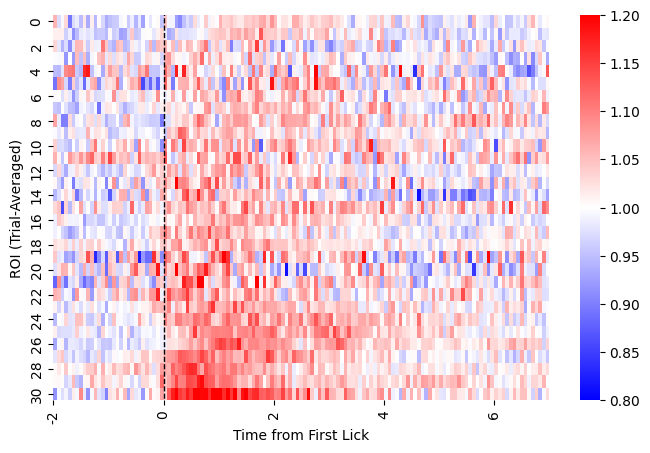

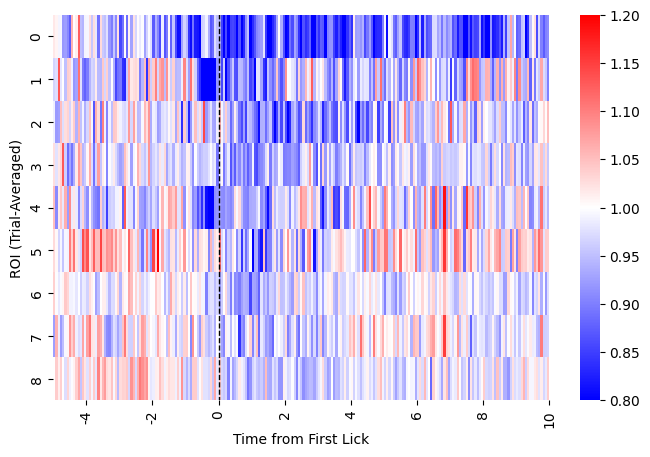

In [40]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active_fed[:, 75:105], axis=1))
sorted_avg_mean = suc_active_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive_fed[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


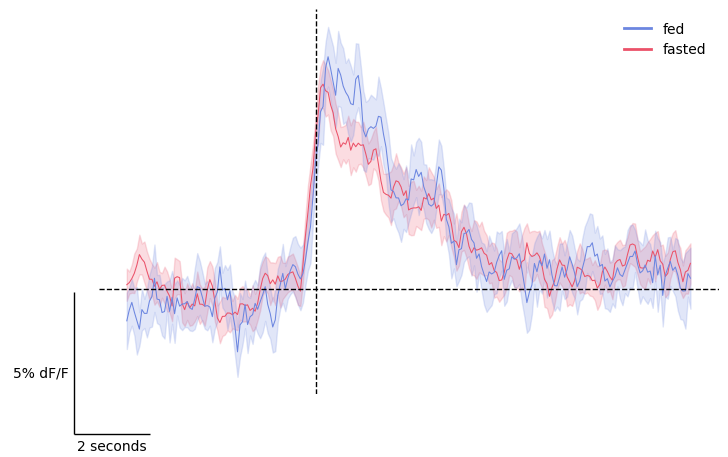

In [127]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_active, axis=0)
avg_suc_inhibited = np.nanmean(suc_active_fed, axis=0)
avg_suc_activated = p2p.moving_average(avg_suc_activated, window_size = 3)
avg_suc_inhibited = p2p.moving_average(avg_suc_inhibited, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = '#6c86e0', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_active_fed, axis=0), avg_suc_inhibited + stats.sem(suc_active_fed, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_state_sucrose_activated.pdf')

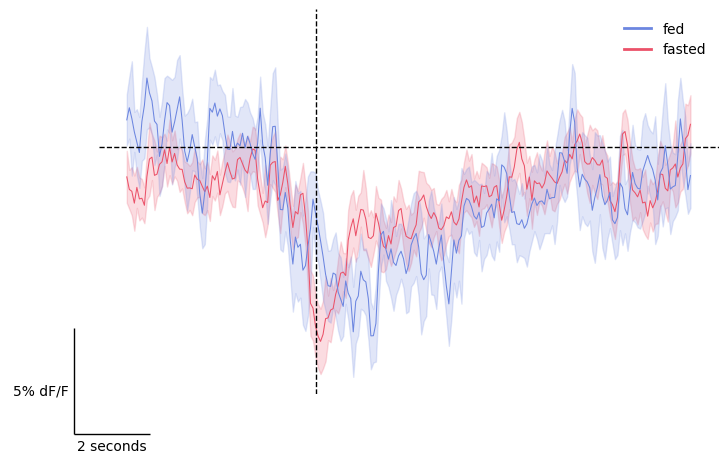

In [128]:

fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated2 = np.nanmean(suc_inactive, axis=0)
avg_suc_inhibited2 = np.nanmean(suc_inactive_fed, axis=0)
avg_suc_activated2 = p2p.moving_average(avg_suc_activated2, window_size = 3)
avg_suc_inhibited2 = p2p.moving_average(avg_suc_inhibited2, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#6c86e0', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(suc_inactive, axis=0), avg_suc_activated2 + stats.sem(suc_inactive, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(suc_inactive_fed, axis=0), avg_suc_inhibited2 + stats.sem(suc_inactive_fed, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_state_sucrose_inhibited.pdf')

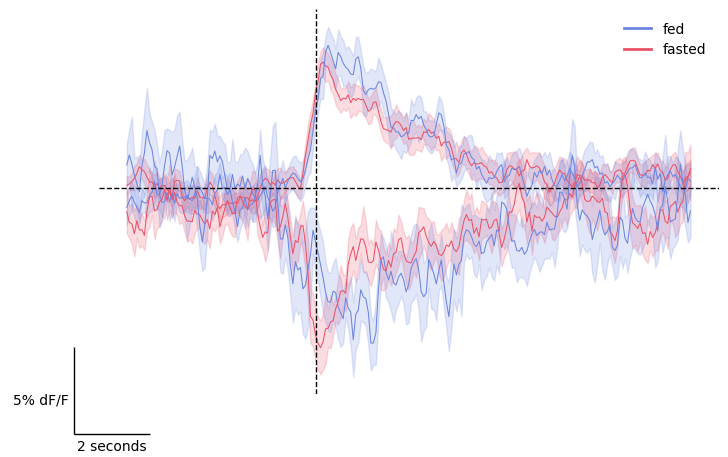

In [129]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(np.arange(0, 225), avg_suc_activated, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = '#6c86e0', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_active_fed, axis=0), avg_suc_inhibited + stats.sem(suc_active_fed, axis=0), color = '#6c86e0', alpha = 0.2)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#6c86e0', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(suc_inactive, axis=0), avg_suc_activated2 + stats.sem(suc_inactive, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(suc_inactive_fed, axis=0), avg_suc_inhibited2 + stats.sem(suc_inactive_fed, axis=0), color = '#6c86e0', alpha = 0.2)

ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_state_sucrose_responsive.pdf')

In [88]:
table = np.array([
    [120, 33, 11],
    [104, 28, 10]
])

# run chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}, p = {p:.3f}, dof = {dof}")
print("Expected counts under independence:")
print(expected)


χ² = 0.02, p = 0.991, dof = 2
Expected counts under independence:
[[120.05228758  32.69281046  11.25490196]
 [103.94771242  28.30718954   9.74509804]]


In [119]:
suc_active.shape

(33, 225)

In [121]:
fasted_activated_auc = p2p.get_auc(suc_active, start_frame = 75, end_frame= 105, normalize = 2000)
fed_activated_auc = p2p.get_auc(suc_active_fed, start_frame = 75, end_frame= 105, normalize = 2000)
fasted_inhibited_auc = p2p.get_auc(suc_inactive, start_frame = 75, end_frame= 105, normalize = 2000)
fed_inhibited_auc = p2p.get_auc(suc_inactive_fed, start_frame = 75, end_frame= 105, normalize = 2000)



auc_df = pd.concat([
    pd.Series(fasted_activated_auc, name='fasted_activated_auc'),
    pd.Series(fed_activated_auc, name='fed_activated_auc'),
    pd.Series(fasted_inhibited_auc, name='fasted_inhibited_auc'),
    pd.Series(fed_inhibited_auc, name='fed_inhibited_auc')], axis=1)

# Save to CSV
auc_df.to_csv('results/untracked_responsivepops_auc_values.csv', index=False)